In [2]:
# Nate Moser
# nmm131@pitt.edu

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nfl_data_py as nfl

2024 done.
Downcasting floats.


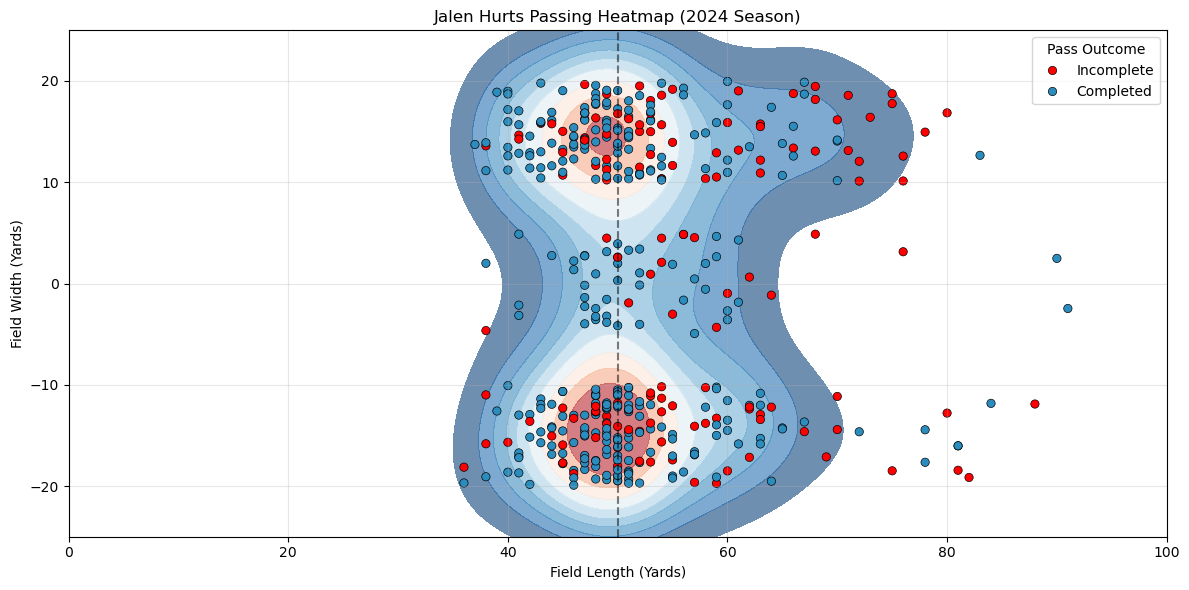

In [4]:
# Load 2024 play-by-play data
pbp = nfl.import_pbp_data([2024])

# Filter to Jalen Hurts' passing plays
hurts_passes = pbp[
    (pbp["pass_attempt"] == 1) &
    (pbp["passer"] == "J.Hurts") &
    (pbp["air_yards"].notna())
].copy()

# Map pass_location to field width (Y)
def map_location(loc):
    if loc == "left":
        return -15 + np.random.uniform(-5, 5)
    elif loc == "right":
        return 15 + np.random.uniform(-5, 5)
    else:
        return np.random.uniform(-5, 5)

hurts_passes["Y"] = hurts_passes["pass_location"].map(map_location)

# 🧠 Offset air_yards to visually center it around midfield (50)
offset = 50 - hurts_passes["air_yards"].median()
hurts_passes["X"] = hurts_passes["air_yards"] + offset

# Label completions
hurts_passes["Completion"] = hurts_passes["complete_pass"].map({1: "Completed", 0: "Incomplete"})

# Plot
plt.figure(figsize=(12, 6))

sns.kdeplot(
    x=hurts_passes["X"], y=hurts_passes["Y"],
    cmap="RdBu_r", fill=True, alpha=0.6, thresh=0.1
)

sns.scatterplot(
    x=hurts_passes["X"], y=hurts_passes["Y"],
    hue=hurts_passes["Completion"],
    palette={"Completed": "#2b8cbe", "Incomplete": "red"},
    edgecolor="black", legend=True
)

# Full field X-axis
plt.xlim(0, 100)
plt.ylim(-25, 25)
plt.axvline(50, color='black', linestyle='--', alpha=0.5)  # Midfield

plt.title("Jalen Hurts Passing Heatmap (2024 Season)")
plt.xlabel("Field Length (Yards)")
plt.ylabel("Field Width (Yards)")
plt.legend(title="Pass Outcome")
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig("jalen_hurts_passing_heatmap_2024.png", dpi=300)
plt.show()


2024 done.
Downcasting floats.


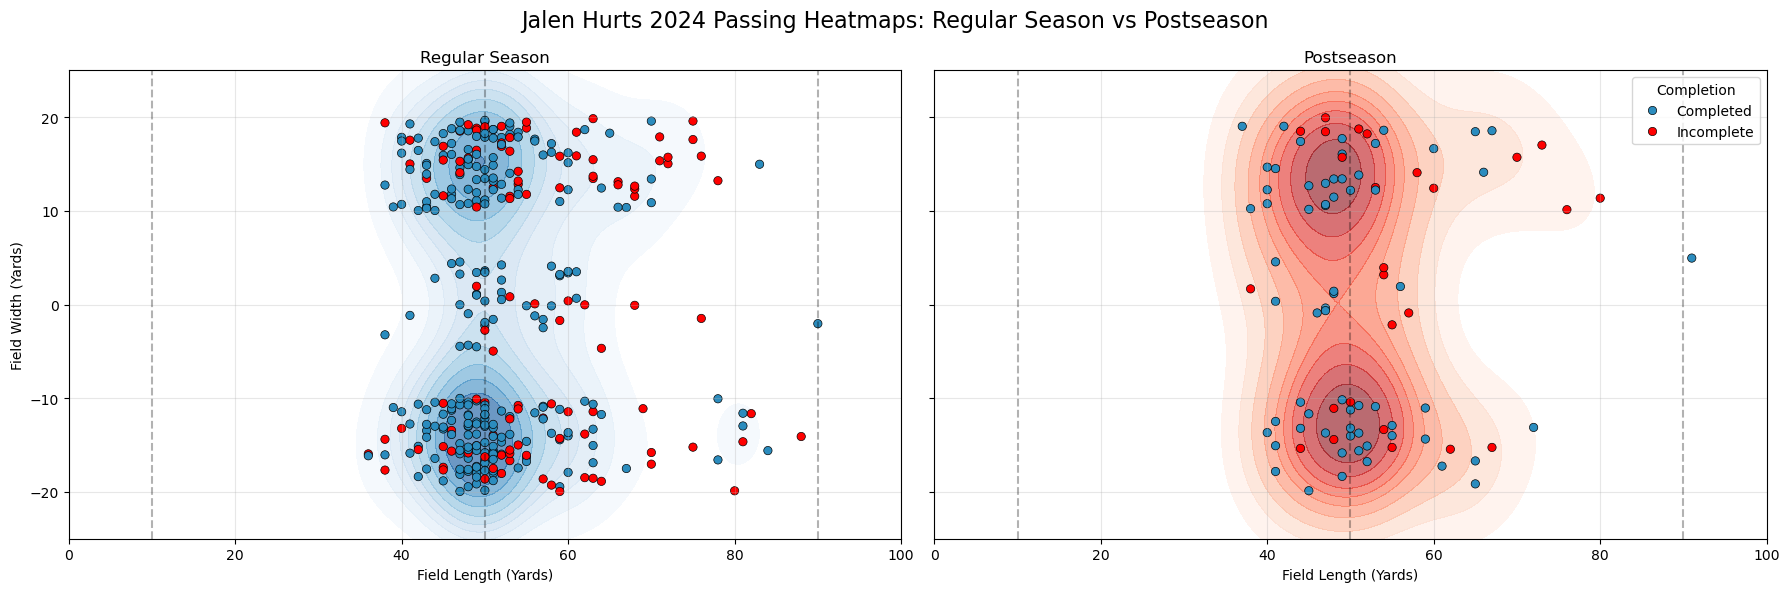

In [5]:
# Load 2024 play-by-play data
df = nfl.import_pbp_data([2024])

# Filter to Hurts' passes
hurts_passes = df[
    (df['pass_attempt'] == 1) &
    (df['passer'] == 'J.Hurts') &
    (df['air_yards'].notna())
].copy()

# Estimate field width from pass location
def map_location(loc):
    if loc == "left":
        return -15 + np.random.uniform(-5, 5)
    elif loc == "right":
        return 15 + np.random.uniform(-5, 5)
    else:
        return np.random.uniform(-5, 5)

hurts_passes["Y"] = hurts_passes["pass_location"].map(map_location)

# Offset air yards to center KDE visually at midfield (50)
offset = 50 - hurts_passes["air_yards"].median()
hurts_passes["X"] = hurts_passes["air_yards"] + offset

# Label completions
hurts_passes["Completion"] = hurts_passes["complete_pass"].map({1: "Completed", 0: "Incomplete"})

# Split regular and postseason
reg = hurts_passes[hurts_passes["season_type"] == "REG"]
post = hurts_passes[hurts_passes["season_type"] == "POST"]

# Create side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Regular Season Plot
sns.kdeplot(
    x=reg["X"], y=reg["Y"],
    cmap="Blues", fill=True, alpha=0.6, thresh=0.1, ax=axes[0]
)
sns.scatterplot(
    x=reg["X"], y=reg["Y"],
    hue=reg["Completion"],
    palette={"Completed": "#2b8cbe", "Incomplete": "red"},
    edgecolor="black", ax=axes[0], legend=False
)
axes[0].set_title("Regular Season")

# Postseason Plot
sns.kdeplot(
    x=post["X"], y=post["Y"],
    cmap="Reds", fill=True, alpha=0.6, thresh=0.1, ax=axes[1]
)
sns.scatterplot(
    x=post["X"], y=post["Y"],
    hue=post["Completion"],
    palette={"Completed": "#2b8cbe", "Incomplete": "red"},
    edgecolor="black", ax=axes[1], legend=True
)
axes[1].set_title("Postseason")

# Shared styling for both axes
for ax in axes:
    ax.set_xlim(0, 100)
    ax.set_ylim(-25, 25)
    ax.set_xlabel("Field Length (Yards)")
    ax.set_ylabel("Field Width (Yards)")
    ax.axvline(10, color='black', linestyle='--', alpha=0.3)
    ax.axvline(50, color='black', linestyle='--', alpha=0.3)
    ax.axvline(90, color='black', linestyle='--', alpha=0.3)
    ax.grid(alpha=0.3)

plt.suptitle("Jalen Hurts 2024 Passing Heatmaps: Regular Season vs Postseason", fontsize=16)
plt.tight_layout()
plt.savefig("jalen_hurts_2024_reg_vs_postseason_heatmap.png", dpi=300)
plt.show()


2024 done.
Downcasting floats.


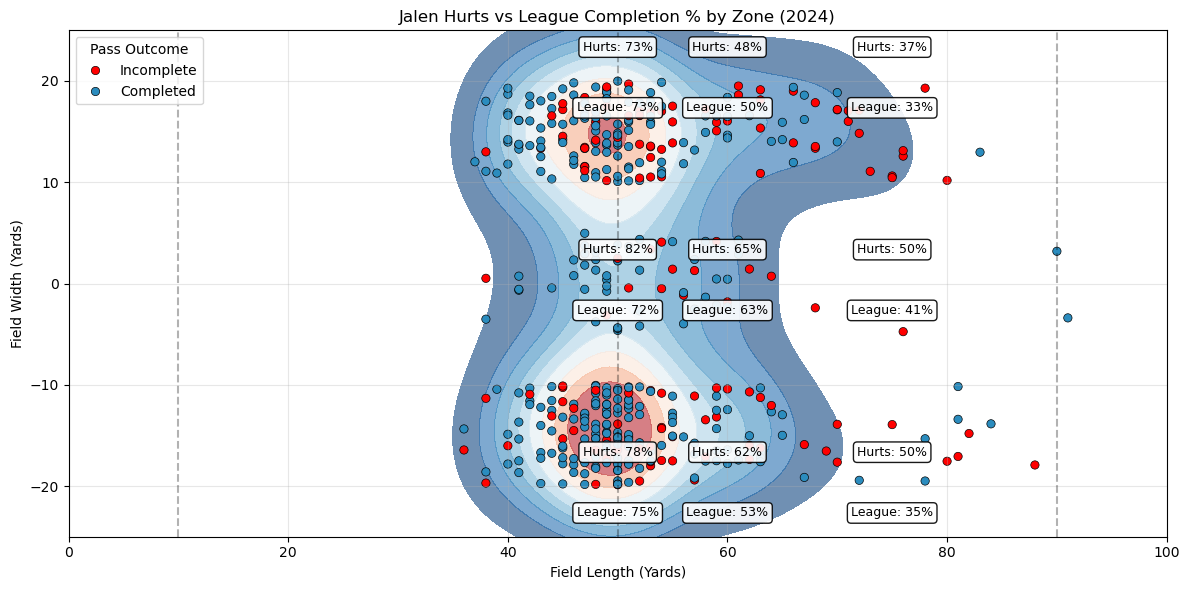

In [6]:
# Load 2024 play-by-play data
df = nfl.import_pbp_data([2024])

# Filter to Hurts' passes
hurts_passes = df[
    (df['pass_attempt'] == 1) &
    (df['passer'] == 'J.Hurts') &
    (df['air_yards'].notna())
].copy()

# Map pass location to Y-coordinate
def map_location(loc):
    if loc == "left":
        return -15 + np.random.uniform(-5, 5)
    elif loc == "right":
        return 15 + np.random.uniform(-5, 5)
    else:
        return np.random.uniform(-5, 5)

hurts_passes["Y"] = hurts_passes["pass_location"].map(map_location)

# Offset X (air yards) to center visually at midfield (50)
offset = 50 - hurts_passes["air_yards"].median()
hurts_passes["X"] = hurts_passes["air_yards"] + offset

hurts_passes["Completion"] = hurts_passes["complete_pass"].map({1: "Completed", 0: "Incomplete"})

# Define zone labels based on air_yards and Y (field width)
def get_zone(x, y):
    if x < 10:
        depth = "Short"
    elif x < 20:
        depth = "Medium"
    else:
        depth = "Deep"

    if y < -10:
        side = "Left"
    elif y > 10:
        side = "Right"
    else:
        side = "Middle"

    return f"{depth}-{side}"

hurts_passes["zone"] = hurts_passes.apply(lambda row: get_zone(row["air_yards"], row["Y"]), axis=1)

# Get league-wide comparison data
league_passes = df[(df['pass_attempt'] == 1) & (df['air_yards'].notna())].copy()
league_passes["Y"] = league_passes["pass_location"].map(map_location)
league_passes["zone"] = league_passes.apply(lambda row: get_zone(row["air_yards"], row["Y"]), axis=1)

league_zone_stats = league_passes.groupby("zone")["complete_pass"].mean().reset_index()
league_zone_stats.columns = ["zone", "league_completion_pct"]

hurts_zone_stats = hurts_passes.groupby("zone")["complete_pass"].mean().reset_index()
hurts_zone_stats.columns = ["zone", "hurts_completion_pct"]

zone_compare = pd.merge(hurts_zone_stats, league_zone_stats, on="zone")
zone_compare["diff"] = zone_compare["hurts_completion_pct"] - zone_compare["league_completion_pct"]

# Plot with KDE and completion % comparison
fig, ax = plt.subplots(figsize=(12, 6))

sns.kdeplot(
    x=hurts_passes["X"], y=hurts_passes["Y"],
    cmap="RdBu_r", fill=True, alpha=0.6, thresh=0.1, ax=ax
)

sns.scatterplot(
    x=hurts_passes["X"], y=hurts_passes["Y"],
    hue=hurts_passes["Completion"],
    hue_order=["Incomplete", "Completed"],
    palette={"Completed": "#2b8cbe", "Incomplete": "red"},
    edgecolor="black", ax=ax
)

# Zone coordinates adjusted to match median-centered layout
zone_coords = {
    "Short-Left": (offset + 5, -20),
    "Short-Middle": (offset + 5, 0),
    "Short-Right": (offset + 5, 20),
    "Medium-Left": (offset + 15, -20),
    "Medium-Middle": (offset + 15, 0),
    "Medium-Right": (offset + 15, 20),
    "Deep-Left": (offset + 30, -20),
    "Deep-Middle": (offset + 30, 0),
    "Deep-Right": (offset + 30, 20),
}

for _, row in zone_compare.iterrows():
    zone = row["zone"]
    hurts_pct = row["hurts_completion_pct"]
    league_pct = row["league_completion_pct"]
    if zone in zone_coords:
        x, y = zone_coords[zone]
        ax.text(x, y + 3, f"Hurts: {hurts_pct:.0%}", fontsize=9, ha='center',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.9))
        ax.text(x, y - 3, f"League: {league_pct:.0%}", fontsize=9, ha='center',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.9))

# Axes + styling
ax.set_xlim(0, 100)
ax.set_ylim(-25, 25)
ax.set_xlabel("Field Length (Yards)")
ax.set_ylabel("Field Width (Yards)")
ax.axvline(10, color='black', linestyle='--', alpha=0.3)
ax.axvline(50, color='black', linestyle='--', alpha=0.3)
ax.axvline(90, color='black', linestyle='--', alpha=0.3)
ax.grid(alpha=0.3)

ax.set_title("Jalen Hurts vs League Completion % by Zone (2024)")
ax.legend(title="Pass Outcome", loc="upper left")
plt.tight_layout()
plt.savefig("jalen_hurts_vs_league_zone_comparison_final.png", dpi=300)
plt.show()


2024 done.
Downcasting floats.


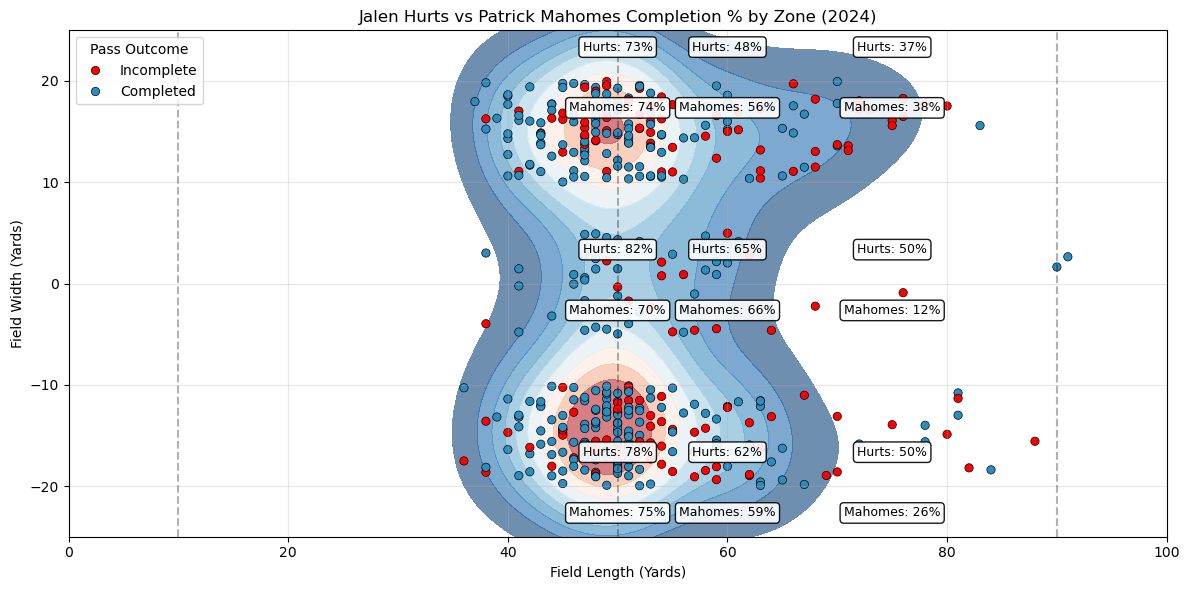

In [7]:
# Load 2024 play-by-play data
df = nfl.import_pbp_data([2024])

# Filter to pass plays with valid air yards
passes = df[
    (df['pass_attempt'] == 1) &
    (df['air_yards'].notna())
].copy()

# Estimate Y coordinate from pass location
def map_location(loc):
    if loc == "left":
        return -15 + np.random.uniform(-5, 5)
    elif loc == "right":
        return 15 + np.random.uniform(-5, 5)
    else:
        return np.random.uniform(-5, 5)

passes["Y"] = passes["pass_location"].map(map_location)

# Offset X to visually center at midfield (based on Hurts' median air_yards)
hurts_air_median = passes[passes["passer"] == "J.Hurts"]["air_yards"].median()
offset = 50 - hurts_air_median
passes["X"] = passes["air_yards"] + offset
passes["Completion"] = passes["complete_pass"].map({1: "Completed", 0: "Incomplete"})

# Define throw zones
def get_zone(x, y):
    if x < 10:
        depth = "Short"
    elif x < 20:
        depth = "Medium"
    else:
        depth = "Deep"

    if y < -10:
        side = "Left"
    elif y > 10:
        side = "Right"
    else:
        side = "Middle"

    return f"{depth}-{side}"

passes["zone"] = passes.apply(lambda row: get_zone(row["air_yards"], row["Y"]), axis=1)

# Separate Hurts and Mahomes
hurts = passes[passes["passer"] == "J.Hurts"].copy()
mahomes = passes[passes["passer"] == "P.Mahomes"].copy()

# Zone-level completion % for both
hurts_stats = hurts.groupby("zone")["complete_pass"].mean().reset_index()
hurts_stats.columns = ["zone", "hurts_completion_pct"]

mahomes_stats = mahomes.groupby("zone")["complete_pass"].mean().reset_index()
mahomes_stats.columns = ["zone", "mahomes_completion_pct"]

# Merge stats
zone_compare = pd.merge(hurts_stats, mahomes_stats, on="zone")
zone_compare["diff"] = zone_compare["hurts_completion_pct"] - zone_compare["mahomes_completion_pct"]

# Plot using Hurts' heatmap
fig, ax = plt.subplots(figsize=(12, 6))

sns.kdeplot(
    x=hurts["X"], y=hurts["Y"],
    cmap="RdBu_r", fill=True, alpha=0.6, thresh=0.1, ax=ax
)

sns.scatterplot(
    x=hurts["X"], y=hurts["Y"],
    hue=hurts["Completion"],
    hue_order=["Incomplete", "Completed"],
    palette={"Completed": "#2b8cbe", "Incomplete": "red"},
    edgecolor="black", ax=ax
)

# Label zones (centered to offset-based X)
zone_coords = {
    "Short-Left": (offset + 5, -20),
    "Short-Middle": (offset + 5, 0),
    "Short-Right": (offset + 5, 20),
    "Medium-Left": (offset + 15, -20),
    "Medium-Middle": (offset + 15, 0),
    "Medium-Right": (offset + 15, 20),
    "Deep-Left": (offset + 30, -20),
    "Deep-Middle": (offset + 30, 0),
    "Deep-Right": (offset + 30, 20),
}

for _, row in zone_compare.iterrows():
    zone = row["zone"]
    hurts_pct = row["hurts_completion_pct"]
    mahomes_pct = row["mahomes_completion_pct"]
    if zone in zone_coords:
        x, y = zone_coords[zone]
        ax.text(x, y + 3, f"Hurts: {hurts_pct:.0%}", fontsize=9, ha='center',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.9))
        ax.text(x, y - 3, f"Mahomes: {mahomes_pct:.0%}", fontsize=9, ha='center',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.9))

# Field styling
ax.set_xlim(0, 100)
ax.set_ylim(-25, 25)
ax.set_xlabel("Field Length (Yards)")
ax.set_ylabel("Field Width (Yards)")
ax.axvline(10, color='black', linestyle='--', alpha=0.3)
ax.axvline(50, color='black', linestyle='--', alpha=0.3)
ax.axvline(90, color='black', linestyle='--', alpha=0.3)
ax.grid(alpha=0.3)

ax.set_title("Jalen Hurts vs Patrick Mahomes Completion % by Zone (2024)")
ax.legend(title="Pass Outcome", loc="upper left")
plt.tight_layout()
plt.savefig("hurts_vs_mahomes_zone_comparison.png", dpi=300)
plt.show()

In [12]:
# Save filtered and processed Jalen Hurts pass data
hurts_passes.to_csv("jalen_hurts_2024_passes.csv", index=False)